In [39]:
#step 1: Load the dataset into a pandas DataFrame and print it along with its shape
import pandas as pd

# creating dataframe containing csv data
df = pd.read_csv('Social_Network_Ads.csv')

print (df) # printing dataframe

df.shape # printing shape

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


(400, 5)

In [40]:
#step 2: Print the column names and the data type of each column
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [41]:
# encoding 'Gender' to be binary 
# dropping 'User ID' from df (unnecessary feature)
from sklearn import preprocessing

l_e = preprocessing.LabelEncoder()

df['Gender'] = l_e.fit_transform(df['Gender'])

df.drop('User ID', axis=1, inplace=True)

print(df.head(20))

    Gender  Age  EstimatedSalary  Purchased
0        1   19            19000          0
1        1   35            20000          0
2        0   26            43000          0
3        0   27            57000          0
4        1   19            76000          0
5        1   27            58000          0
6        0   27            84000          0
7        0   32           150000          1
8        1   25            33000          0
9        0   35            65000          0
10       0   26            80000          0
11       0   26            52000          0
12       1   20            86000          0
13       1   32            18000          0
14       1   18            82000          0
15       1   29            80000          0
16       1   47            25000          1
17       1   45            26000          1
18       1   46            28000          1
19       0   48            29000          1


In [42]:
#step 3: Normalize the numerical input features 

# making copy of df
scaled_features = df.copy()

# determining which cols to scale
col_names = ['Age', 'EstimatedSalary']
features = scaled_features[col_names]

# scale columns 
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

scaled_features[col_names] = features

# splitting model into test and train groups 
from sklearn.model_selection import train_test_split

# creating X and y sets 
X = df.iloc[:,0:3] # gender, age, salary
y = df.iloc[:,3]   # purchased 

# print(X) # print to make sure each contains correct features
# print(y)

# creating test and train sets for X and y 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 44)

In [44]:
#step 4: Perform Random Forest Classification using sklearn. Make sure to enable bootstrap and oob_score
#step 5: Find the oob error for different numbers of trees. Figure out which parameter sets the number of trees.

from sklearn.ensemble import RandomForestClassifier

for i in range(15, 150):
    forest = RandomForestClassifier(bootstrap=True, oob_score = True, n_estimators =i)
    forest.fit(X_train, y_train)
    print(i, round(1-forest.oob_score_, 5))
    

15 0.11786
16 0.11429
17 0.15714
18 0.12143
19 0.12143
20 0.125
21 0.12857
22 0.11786
23 0.12143
24 0.11429
25 0.11786
26 0.125
27 0.10357
28 0.11786
29 0.11071
30 0.10714
31 0.12143
32 0.10357
33 0.11786
34 0.10714
35 0.10357
36 0.10357
37 0.10714
38 0.13214
39 0.10714
40 0.10357
41 0.10714
42 0.12857
43 0.13929
44 0.11786
45 0.11071
46 0.11786
47 0.10357
48 0.10357
49 0.11786
50 0.11071
51 0.10357
52 0.11429
53 0.125
54 0.10714
55 0.10714
56 0.11071
57 0.11429
58 0.10357
59 0.10357
60 0.1
61 0.10714
62 0.11071
63 0.11786
64 0.11071
65 0.1
66 0.13214
67 0.10357
68 0.10714
69 0.11071
70 0.11071
71 0.11071
72 0.11429
73 0.12143
74 0.10714
75 0.11071
76 0.11071
77 0.125
78 0.11071
79 0.10357
80 0.11429
81 0.1
82 0.1
83 0.10357
84 0.10357
85 0.11071
86 0.10714
87 0.10714
88 0.10714
89 0.10357
90 0.11786
91 0.11786
92 0.11786
93 0.11786
94 0.11071
95 0.10357
96 0.11071
97 0.11429
98 0.11786
99 0.12143
100 0.11786
101 0.11071
102 0.11071
103 0.11071
104 0.11071
105 0.11786
106 0.11071
107 0

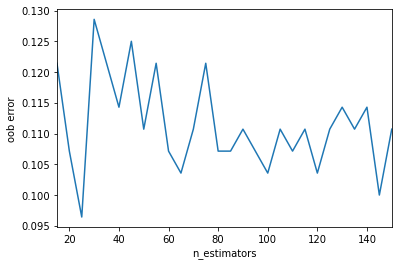

In [46]:
#step 6: Plot the oob error vs number of trees. (Similar to example in class) 
#######  and find the number of trees with the lowest error. If multiple, report all.
    
import matplotlib.pyplot as plt 

# creating arrays to be filled with <i, oob error> for <x,y>
xs = []
ys = []

# loop through each i (15-150) and append each <i,oob> to <xs,ys>
for i in range(15, 150+1, 5):
    random_forest = RandomForestClassifier(n_estimators = i, bootstrap = True, oob_score = True)
    random_forest.fit(X_train, y_train)
    oob_error = 1 - random_forest.oob_score_
    xs.append(i)
    ys.append(oob_error)

# plot oob error vs. number trees
plt.plot(xs, ys)
plt.xlim(15,150)
plt.xlabel('n_estimators')
plt.ylabel('oob error')
plt.show()